<ipython-input-3-5920c5067529>:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("cleaned_sales_data.csv", index_col="Order Date", infer_datetime_format=True, parse_dates=True)


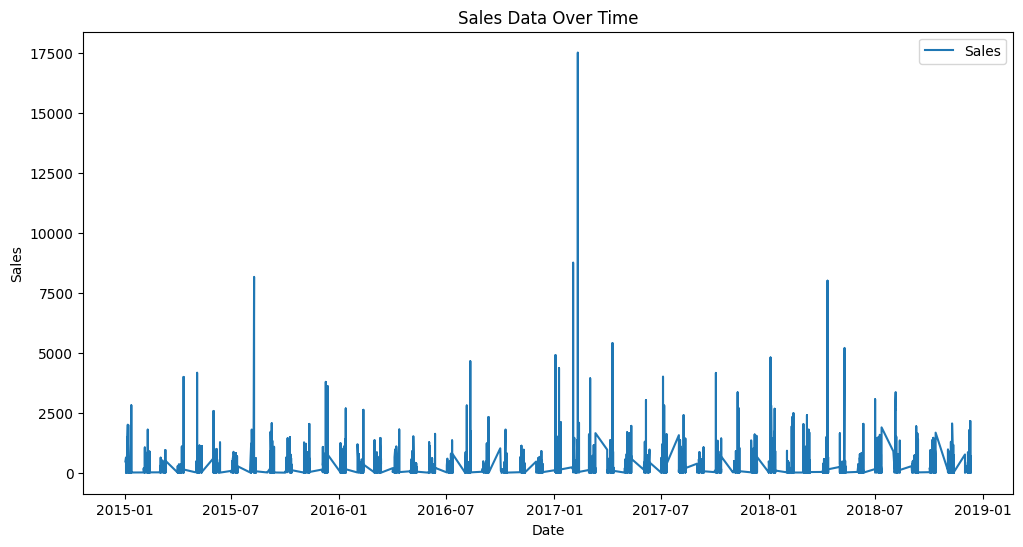

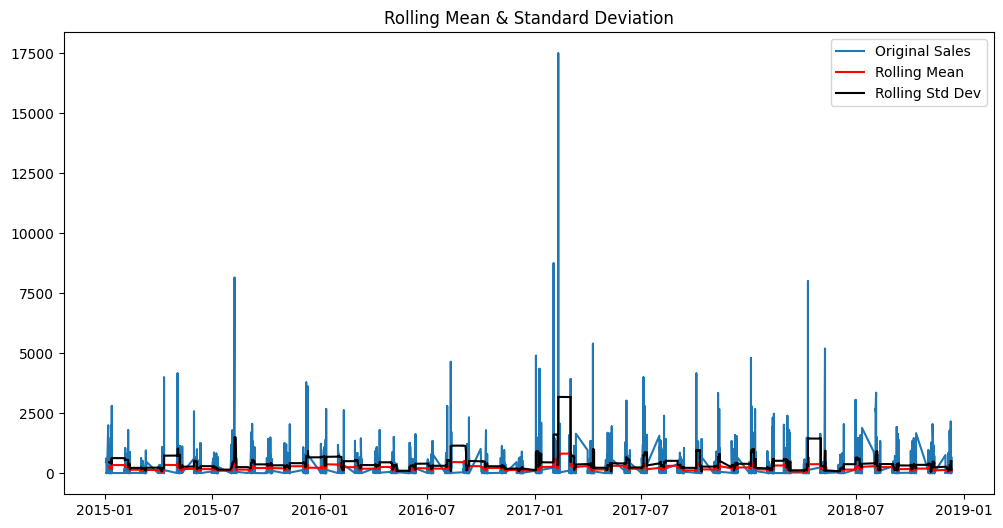

ADF Test on Original Sales Data:
ADF Statistic: -61.737484433108676
p-value: 0.0
# Lags Used: 0
Number of Observations: 3958
Critical Values:
1%: -3.4320032456041702
5%: -2.8622705134633857
10%: -2.5671588604603004

Data is stationary (reject H0).


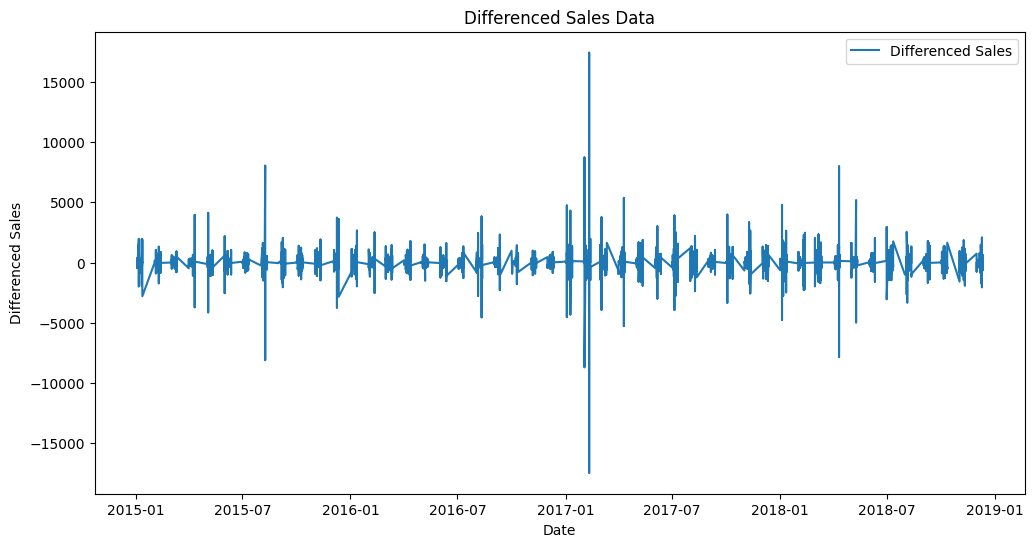


ADF Test on Differenced Sales Data:
ADF Statistic: -19.813520040140407
p-value: 0.0
# Lags Used: 30
Number of Observations: 3927
Critical Values:
1%: -3.4320163049810684
5%: -2.862276282346099
10%: -2.567161931577363

Data is stationary (reject H0).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load your data
df = pd.read_csv("cleaned_sales_data.csv", index_col="Order Date", infer_datetime_format=True, parse_dates=True)

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df["Sales"], label="Sales")
plt.title("Sales Data Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Calculate and plot rolling statistics
rolling_mean = df["Sales"].rolling(window=30).mean()
rolling_std = df["Sales"].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df["Sales"], label="Original Sales")
plt.plot(rolling_mean, label="Rolling Mean", color='red')
plt.plot(rolling_std, label="Rolling Std Dev", color='black')
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

# Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations']
    for label, value in zip(labels, result[:4]):
        print(f"{label}: {value}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    if result[1] <= 0.05:
        print("\nData is stationary (reject H0).")
    else:
        print("\nData is non-stationary (fail to reject H0).")

print("ADF Test on Original Sales Data:")
adf_test(df["Sales"])

# Apply differencing if needed
df['Sales_Diff'] = df['Sales'].diff()

# Re-plot after differencing
plt.figure(figsize=(12, 6))
plt.plot(df['Sales_Diff'], label="Differenced Sales")
plt.title("Differenced Sales Data")
plt.xlabel("Date")
plt.ylabel("Differenced Sales")
plt.legend()
plt.show()

print("\nADF Test on Differenced Sales Data:")
adf_test(df['Sales_Diff'])